In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import random as rnd    

In [36]:
df = pd.read_csv(r"D:\Programming Stuffs\Data Science\Datasets\weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,0.000000,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [37]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,166.410969,161.440357
std,9999.338615,32.108439
min,0.000000,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.177202,187.169525
max,1000000.000000,269.989698


In [38]:
df.shape

(10000, 3)

## Visualize with Histogram

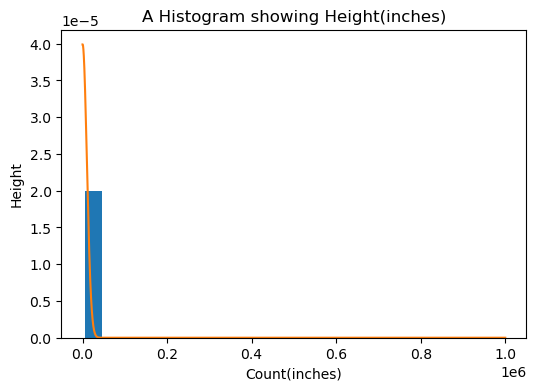

In [39]:
plt.figure(figsize=(6,4))
plt.title('A Histogram showing Height(inches)')
plt.hist(df.Height, bins=20,rwidth = 0.8, density=True)
plt.xlabel('Count(inches)')
plt.ylabel('Height')

rng = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))



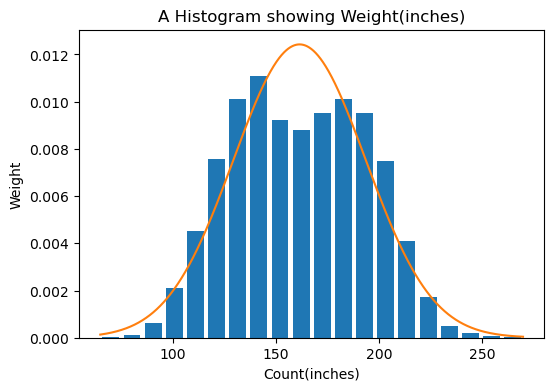

In [40]:
plt.figure(figsize=(6,4))
plt.title('A Histogram showing Weight(inches)')
plt.hist(df.Weight, bins=20,rwidth = 0.8,density = True)
plt.xlabel('Count(inches)')
plt.ylabel('Weight')

#Plot the Probability Density Function(PDF) curve
rng = np.arange(df.Weight.min(),df.Weight.max(),0.1)
plt.plot(rng, norm.pdf(rng,df.Weight.mean(),df.Weight.std()))

## Building an Outlier Detector

In [41]:
import pandas as pd
import random as rnd

class OutlierDetector:
    def __init__(self, sample_size):
        self.sample_size = sample_size
        self.detected_columns = None

    def detect_numerical_columns(self, data):
        numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
        self.detected_columns = numerical_columns

    def sample_data(self, data):
        samples = []
        for column in self.detected_columns:
            samples.append(rnd.sample(data[column].tolist(), self.sample_size))
        return samples

    def compare_samples(self, sample1, sample2, sample3):
        samples = [sample1, sample2, sample3]
        sample_dfs = []

        for i, sample in enumerate(samples):
            sample_df = pd.DataFrame({col: sample[i] for i, col in enumerate(self.detected_columns)})
            sample_dfs.append(sample_df)

        # Calculating mean and std of the sampled data
        means = [sample_df.mean() for sample_df in sample_dfs]
        stds = [sample_df.std() for sample_df in sample_dfs]

        mean_changes = [abs(means[0] - means[1]) / ((means[0] + means[1]) / 2) * 100,
                        abs(means[0] - means[2]) / ((means[0] + means[2]) / 2) * 100,
                        abs(means[1] - means[2]) / ((means[1] + means[2]) / 2) * 100]

        std_changes = [abs(stds[0] - stds[1]) / ((stds[0] + stds[1]) / 2) * 100,
                       abs(stds[0] - stds[2]) / ((stds[0] + stds[2]) / 2) * 100,
                       abs(stds[1] - stds[2]) / ((stds[1] + stds[2]) / 2) * 100]

        return mean_changes, std_changes

    def pick_sample(self, mean_changes, std_changes):
        chosen_sample = None
        min_mean_change = min(mean_changes[0])  # Choose the first element of mean_changes

        for i, (mean_change, std_change) in enumerate(zip(mean_changes, std_changes)):
            if mean_change[0] < 5 and std_change[0] < 5: 
                chosen_sample = i
                break

        if chosen_sample is not None:
            print(f"Sample {chosen_sample + 1} chosen for outlier detection.")
        else:
            print("No suitable sample found for outlier detection.")



    def filter_outliers(self, data):
        outliers = pd.DataFrame()
        for column in self.detected_columns:
            chosen_mean = data[column].mean()
            chosen_std = data[column].std()
            upper_limit = chosen_mean + 3 * chosen_std
            lower_limit = chosen_mean - 3 * chosen_std

            column_outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
            outliers = pd.concat([outliers, column_outliers])

        outliers = outliers.drop_duplicates()
            
        print(f'The number of outliers detected are {outliers.shape[0]}\n')

        if outliers.shape[0] > 0:
            filtered_data = data[~data.index.isin(outliers.index)]
            return outliers, filtered_data.reset_index(drop=True)
        else:
            print("No outliers detected.\n")
            return pd.DataFrame(), data.copy()


data = df
sample_size = int(0.5 * len(data))  
outlier_detector = OutlierDetector(sample_size)
outlier_detector.detect_numerical_columns(data)
sample1 = outlier_detector.sample_data(data)
sample2 = outlier_detector.sample_data(data)
sample3 = outlier_detector.sample_data(data)

mean_changes, std_changes = outlier_detector.compare_samples(sample1, sample2, sample3)
print(f'mean_changes: {mean_changes}, std_changes: {std_changes}\n')

outlier_detector.pick_sample(mean_changes, std_changes)

outliers, filtered_data = outlier_detector.filter_outliers(data)
print(outliers)
print()
print("Cleaned Data with No Outlier\n")
print(filtered_data)

mean_changes: [Height    0.034456
Weight    0.142539
dtype: float64, Height    120.194875
Weight      0.091960
dtype: float64, Height    120.172861
Weight      0.050578
dtype: float64], std_changes: [Height    0.000011
Weight    0.535050
dtype: float64, Height    199.722045
Weight      0.873568
dtype: float64, Height    199.722045
Weight      1.408601
dtype: float64]

Sample 1 chosen for outlier detection.
The number of outliers detected are 3

      Gender          Height      Weight
9999  Female  1000000.000000  113.649103
2014    Male       78.998742  269.989698
9285  Female       54.263133   64.700127

Cleaned Data with No Outlier

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male   0.000000  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9992  Female  59.098250  110.529686
9993  Female  66.172652  136.777454
9994  Female  67.067155  170.867

ModuleNotFoundError: No module named 'git'